<a href="https://colab.research.google.com/github/junghyeonsu/Algorithm_Application/blob/master/daegeon_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# 사용되는 패키지들 입니다.
# K-Means : sklearn
# 데이터 전처리 : pandas, numpy 
# 데이터 시각화 : seaborn, matplotlib 
from matplotlib import font_manager, rc
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import seaborn as sns

# matplotlib 라이브러리에서 한글 폰트가 깨지기 때문에
# 폰트를 바꿔주어야 합니다. 
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


위의 코드를 실행시킨 다음 

![image](https://user-images.githubusercontent.com/54893898/83987816-6e500c00-a97c-11ea-8d3f-c0eac511fb27.png)

위 그림과 같이 런타임 다시 시작을

해주어야 합니다!!

출처 : https://pinkwink.kr/1255

     행정동       유동인구
0   가수원동  185855413
1   가양1동  107395114
2   가양2동  119839878
3    가장동  107329060
4   갈마1동  186121238
..   ...        ...
74  판암1동   98584970
75  판암2동   27969241
76   홍도동   67897008
77   회덕동  229987223
78    효동  124895676

[79 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

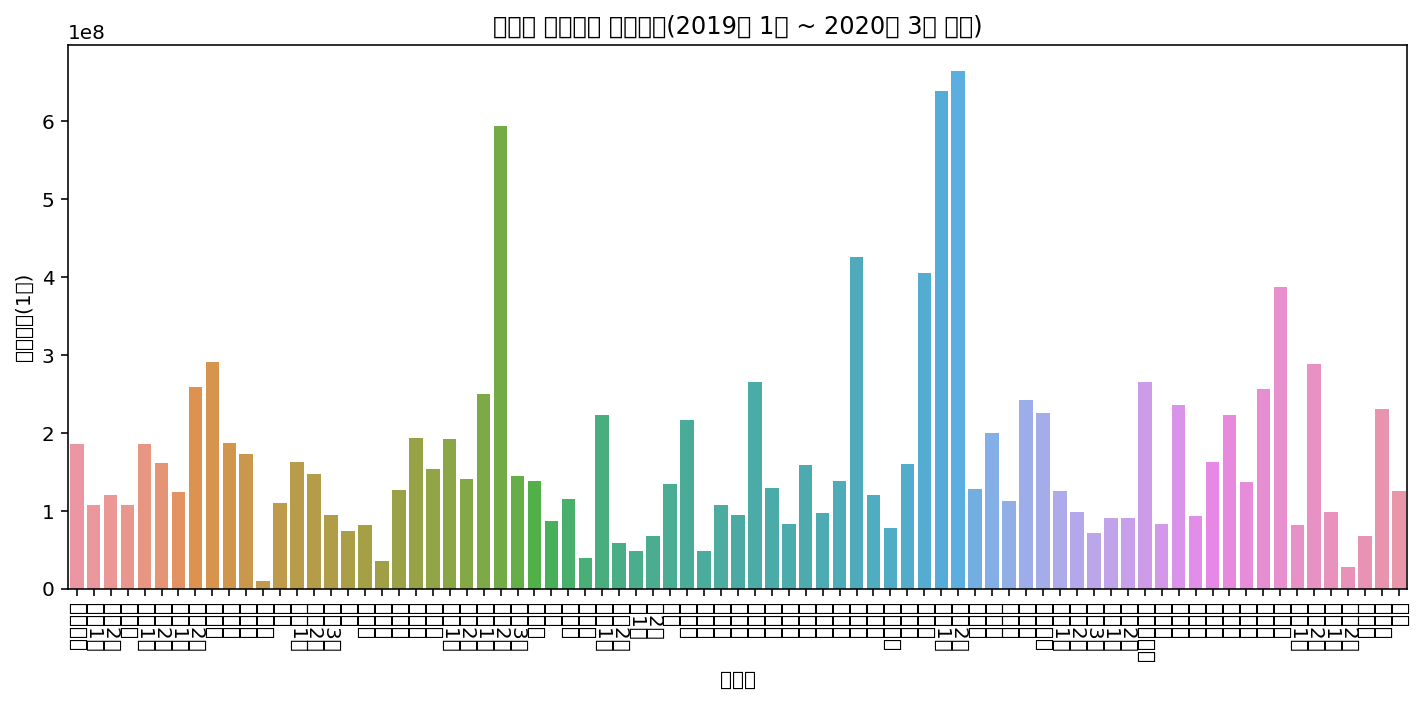

In [34]:
# 유동인구 파일 전처리 과정입니다.
population_file= pd.read_csv('floating_population_201901_202003.csv',thousands = ',')
building_population = population_file['행정동']

# 필요없는 column들은 제거해줍니다.
del population_file['시간대']
del population_file['연월']
del population_file['시']
del population_file['구']
del population_file['행정동']

# csv파일의 데이터들을 깔끔하게 정리해줍니다.
population_file = population_file.fillna(0).replace(' - ', 0)
population_file = population_file.astype(str).astype(float).astype(int)
population_file['sum'] = population_file.sum(axis=1)
sum = population_file['sum']

# 필요한 데이터 값만 추출해냅니다.
data = {
    "행정동": building_population,
    "유동인구" : sum
}

# 유동인구 시각화 과정입니다.
plt.rc('font', family='NanumGothic') 
plt.figure(figsize=(12,5))
df = pd.DataFrame(data)
group_building_population = df.groupby(['행정동'])['유동인구'].sum().reset_index()

print(group_building_population)

ax = sns.barplot(x=group_building_population['행정동'], y=group_building_population['유동인구'])
ax.set(xlabel='행정동', ylabel='유동인구(1억)')
plt.xticks(rotation = - 90 )
plt.title('대전시 행정동별 유동인구(2019년 1월 ~ 2020년 3월 기준)')
plt.show()

# 1e8 = 100000000 (1억)

약 15개월이라서.. 단위가 이런것같습니다!

     행정동           매출액
0   가수원동  192303662978
1   가양1동   71570453044
2   가양2동   75950059388
3    가장동   84910393961
4   갈마1동  139435674783
..   ...           ...
74  판암1동   40507301250
75  판암2동    9046109848
76   홍도동   44409348784
77   회덕동   45827747277
78    효동  162700380206

[79 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

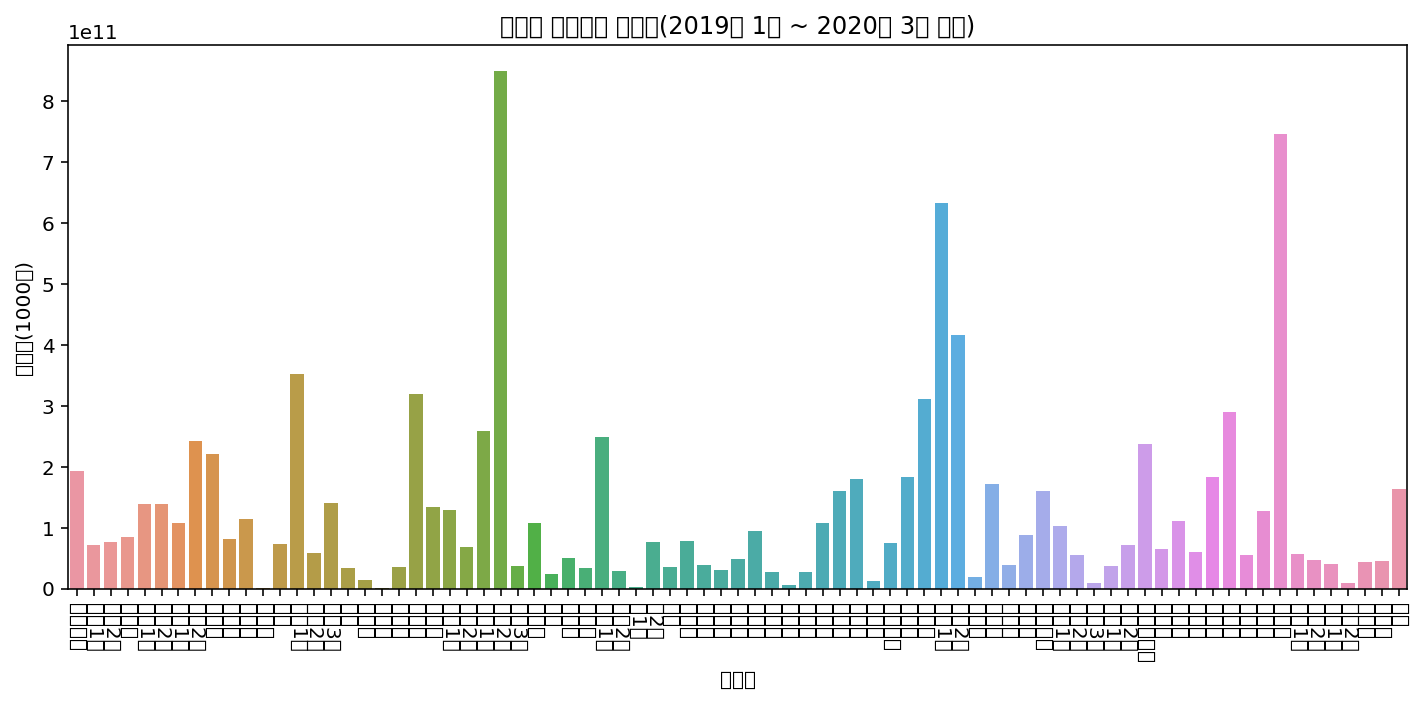

In [17]:
# 매출액 파일 전처리 과정입니다.
card_sales= pd.read_csv('card_sales_201901_202003.csv')

# 필요없는 column은 제거해줍니다.
del card_sales['연월']
del card_sales['시']
del card_sales['자치구']
del card_sales['분류']

# 데이터들을 깔끔하게 정리해주고, 행정동별 기준, 매출액을 묶어줍니다.
card_sales = card_sales.fillna(0).replace(' - ', 0)
group_building_card_sales = card_sales.groupby(['행정동'])['매출액'].sum().reset_index() 


# 시각화 과정입니다.
plt.figure(figsize=(12,5))                                             
print(group_building_card_sales)
ax = sns.barplot(x=group_building_card_sales['행정동'], y=group_building_card_sales['매출액']) 
ax.set(xlabel='행정동', ylabel='매출액(1000억)')                                
plt.xticks(rotation = - 90 )  
plt.title('대전시 행정동별 매출액(2019년 1월 ~ 2020년 3월 기준)')
plt.show()              

# 1e11 = 100000000000 (천억)

In [0]:
# 행정동별 그룹화 된 매출액입니다.
group_building_card_sales

,행정동,매출액
0,가수원동,192303662978
1,가양1동,71570453044
2,가양2동,75950059388
3,가장동,84910393961
4,갈마1동,139435674783
...,...,...
74,판암1동,40507301250
75,판암2동,9046109848
76,홍도동,44409348784
77,회덕동,45827747277


In [0]:
# 행정동별 그룹화 된 유동인구입니다.
group_building_population

,행정동,유동인구
0,가수원동,185855413
1,가양1동,107395114
2,가양2동,119839878
3,가장동,107329060
4,갈마1동,186121238
...,...,...
74,판암1동,98584970
75,판암2동,27969241
76,홍도동,67897008
77,회덕동,229987223


In [0]:
# 매출액과 유동인구 데이터를 합쳐줍니다.
# 합쳐주는 이유는 k-Means 함수에 넣어주기 위함입니다.
merge_data = pd.merge(group_building_population,group_building_card_sales)
merge_data

,행정동,유동인구,매출액
0,가수원동,185855413,192303662978
1,가양1동,107395114,71570453044
2,가양2동,119839878,75950059388
3,가장동,107329060,84910393961
4,갈마1동,186121238,139435674783
...,...,...,...
74,판암1동,98584970,40507301250
75,판암2동,27969241,9046109848
76,홍도동,67897008,44409348784
77,회덕동,229987223,45827747277


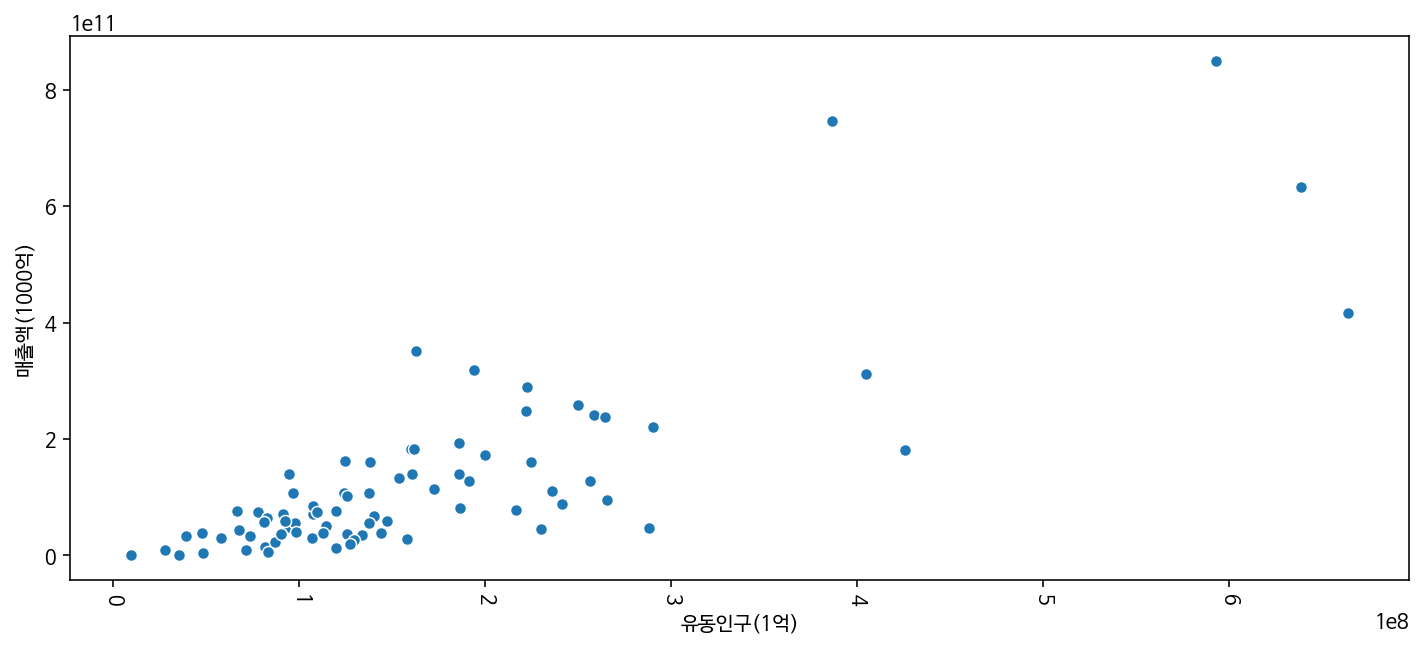

In [0]:
# merge_data의시각화 과정입니다.
# x축은 유동인구, y축은 매출액으로 지정해주었습니다.
plt.figure(figsize=(12,5))                                             
ax = sns.scatterplot(x=merge_data['유동인구'], y=merge_data['매출액'])           
ax.set(xlabel='유동인구(1억)', ylabel='매출액(1000억)')                               
plt.xticks(rotation = - 90 )                                         
plt.show()    

In [0]:
# K-Means에 데이터를 넣기위해 유동인구와 매출액 컬럼만 빼내옵니다.
kmeans_data = merge_data.iloc[:,1:]
# 그리고 K-means를 실행해줍니다.
kmeans = KMeans(n_clusters=3).fit(kmeans_data)
print(kmeans.labels_)
# 클러스터값들을 merge_data에 넣어줍니다.
merge_data['클러스터ID'] = kmeans.labels_
merge_data

[2 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 1 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 0 0 2 2 1 2 0 2 0 0 2 0 0 0 0 0 2 0 0 0 2 2 0 0 1 0 0
 0 0 0 0 2]


,행정동,유동인구,매출액,클러스터ID
0,가수원동,185855413,192303662978,2
1,가양1동,107395114,71570453044,0
2,가양2동,119839878,75950059388,0
3,가장동,107329060,84910393961,0
4,갈마1동,186121238,139435674783,0
...,...,...,...,...
74,판암1동,98584970,40507301250,0
75,판암2동,27969241,9046109848,0
76,홍도동,67897008,44409348784,0
77,회덕동,229987223,45827747277,0


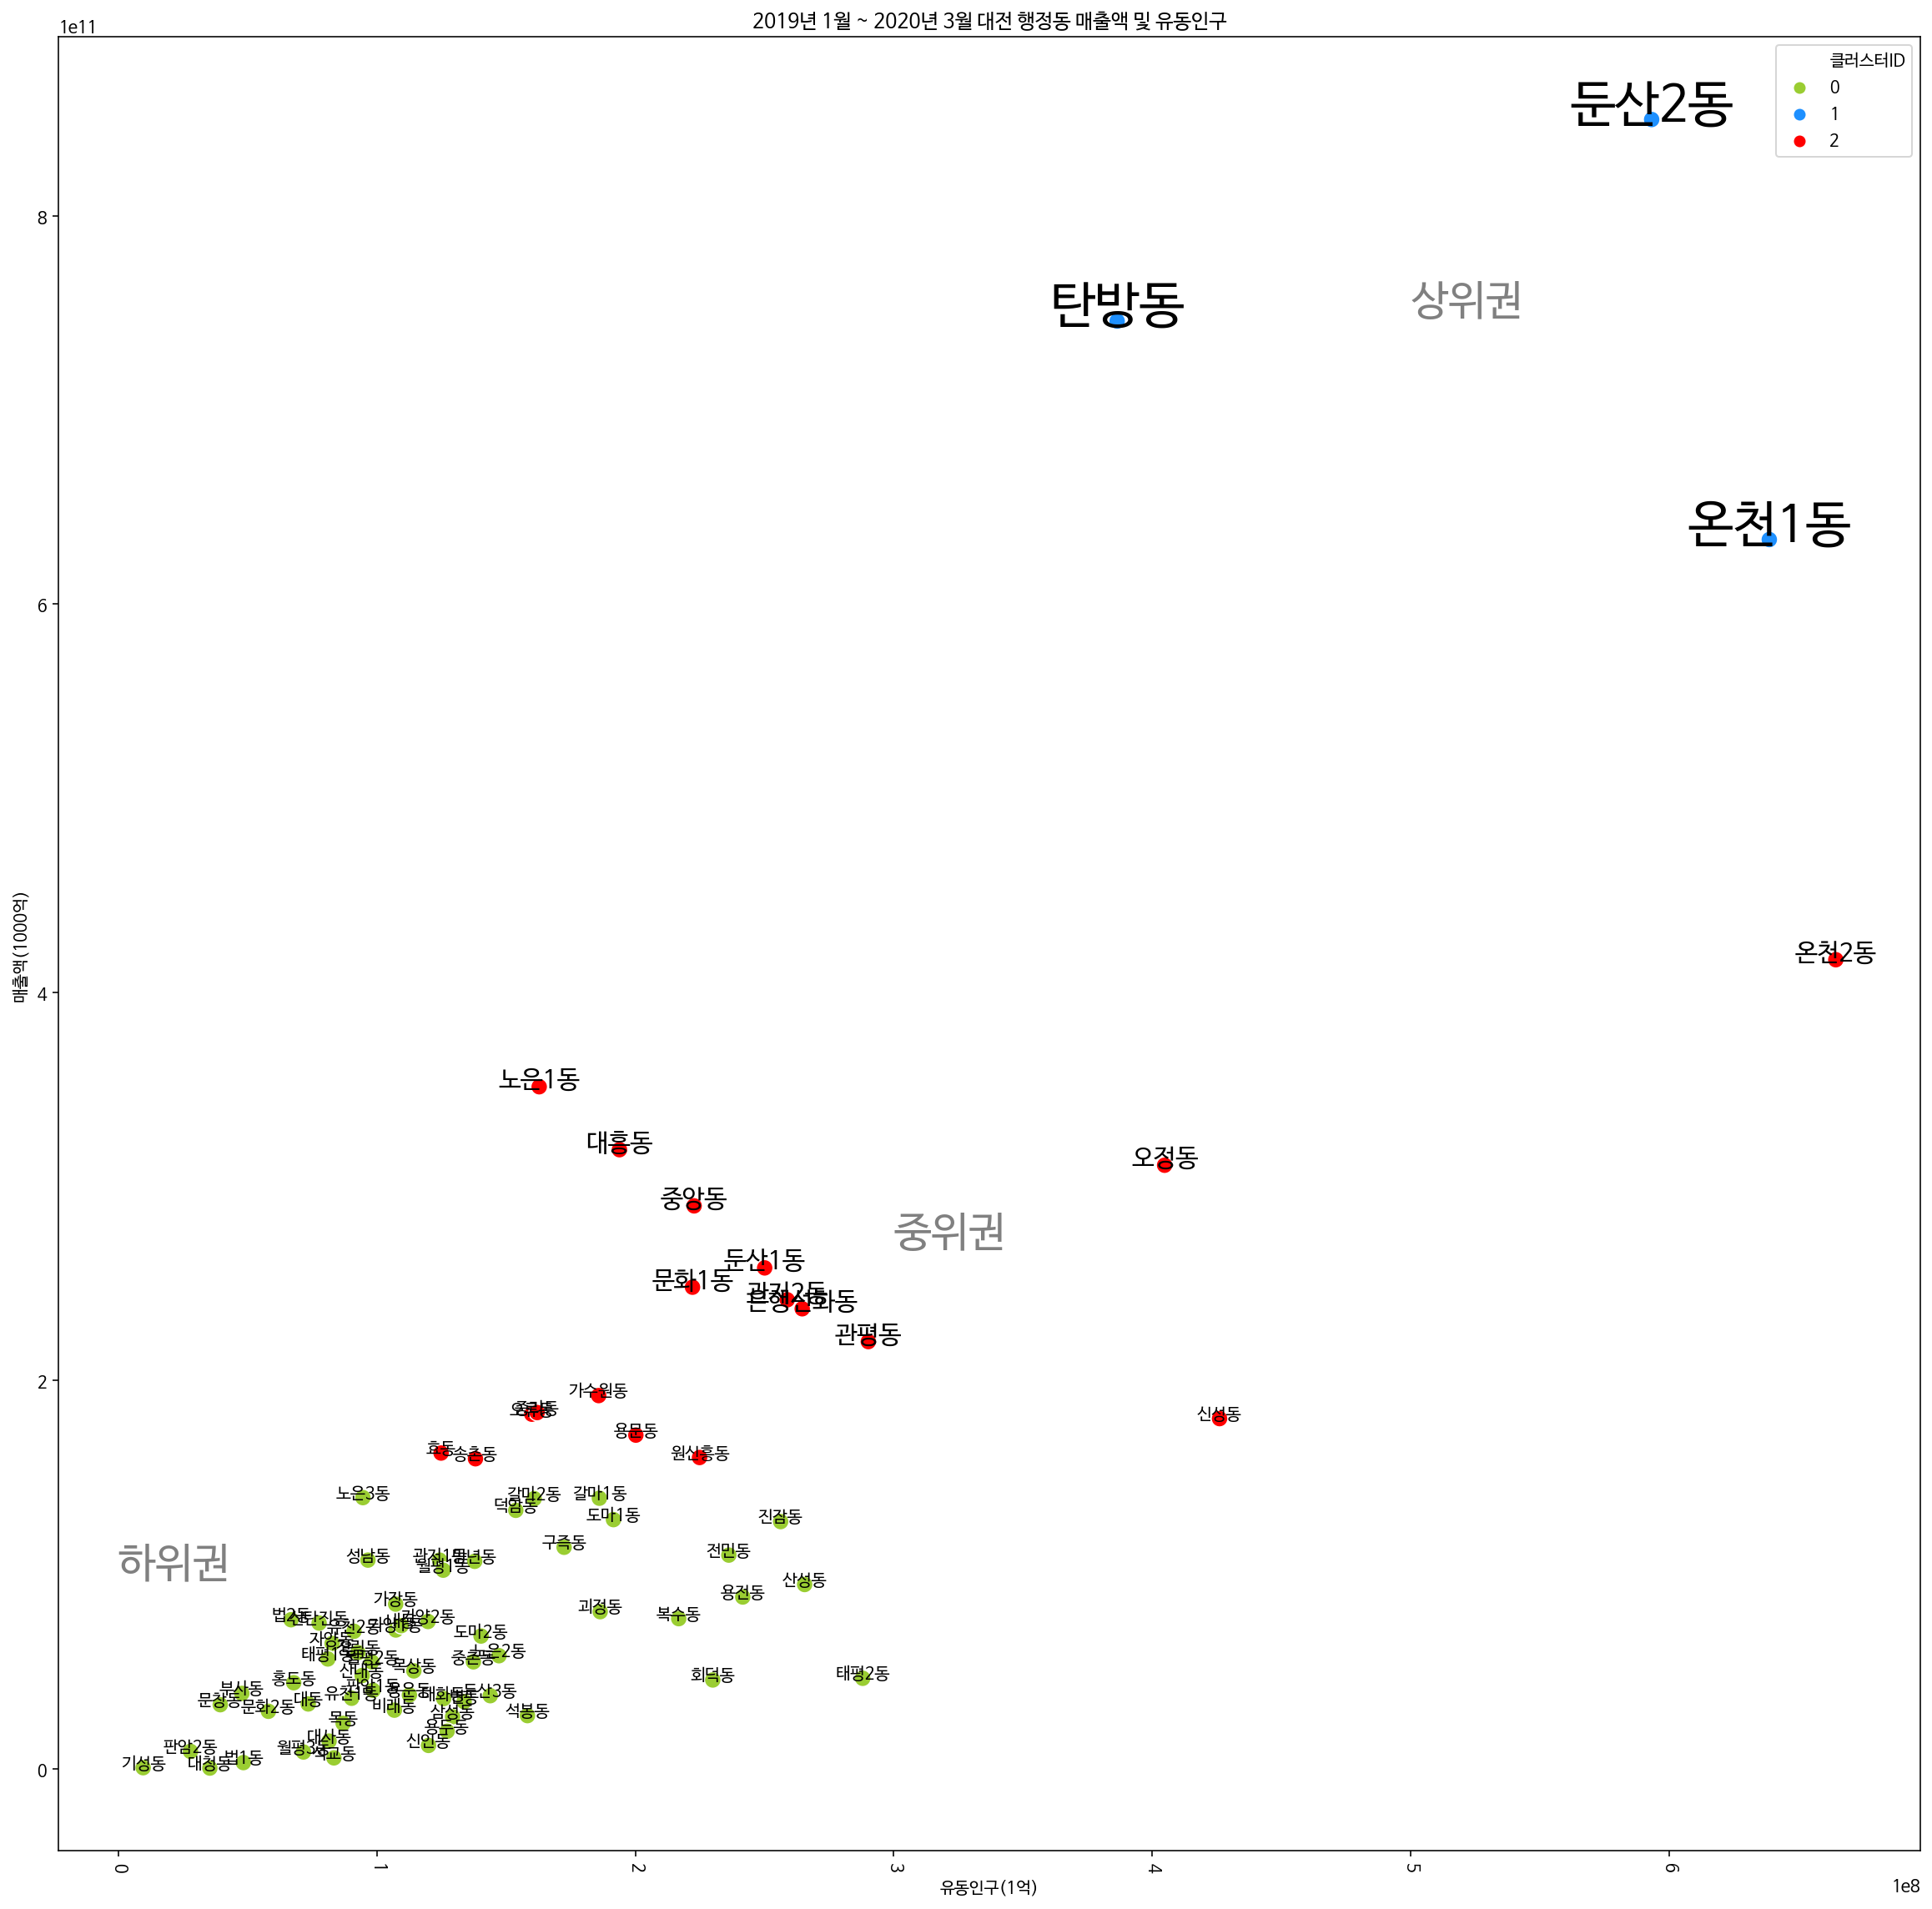

In [0]:
# 시각화 과정입니다.
plt.figure(figsize=(20,20))      
# seaborn 패키지의 스캐터플랏                                     
ax = sns.scatterplot(x=merge_data['유동인구'], y=merge_data['매출액'],
                     hue=merge_data["클러스터ID"],s=100, palette=['yellowgreen','dodgerblue','red'])           
ax.set(xlabel='유동인구(1억)', ylabel='매출액(1000억)') 

style = dict(size=25, color='gray') 
style_low = dict(size=10, color='black')
style_middle = dict(size=15, color='black')
style_high = dict(size=30, color='black')

ax.text(0,         100000000000, "하위권", ha='left', **style)  
ax.text(300000000, 270000000000, "중위권", **style)  
ax.text(500000000, 750000000000, "상위권", **style)

# for문을 돌면서 행정동 text를 달아주는 코드입니다.
for i in range(len(merge_data['행정동'])):
  if merge_data['매출액'][i] < 200000000000:
    ax.text(merge_data['유동인구'][i], merge_data['매출액'][i], merge_data['행정동'][i],ha='center' ,**style_low)
  elif  merge_data['매출액'][i] < 500000000000:
    ax.text(merge_data['유동인구'][i], merge_data['매출액'][i], merge_data['행정동'][i],ha='center' ,**style_middle)
  else:
    ax.text(merge_data['유동인구'][i], merge_data['매출액'][i], merge_data['행정동'][i],ha='center' ,**style_high)

plt.title('2019년 1월 ~ 2020년 3월 대전 행정동 매출액 및 유동인구')
plt.xticks(rotation = - 90 )                                         
plt.show()    